<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/KMeans_Color_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from google.colab import files

In [ ]:
data = files.upload()

Saving palm_trees.jpg to palm_trees.jpg


In [ ]:
img_array = mpimg.imread('palm_trees.jpg')
img_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [ ]:
img_array.shape  # (H, W, C)

(1401, 934, 3)

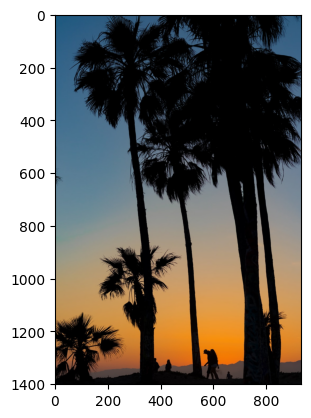

In [ ]:
plt.imshow(img_array)

In [ ]:
#  (H, W, C) convert-----> 2D (H*W, C)

In [ ]:
(h, w, c) = img_array.shape
h

1401

In [ ]:
img_array_2d = img_array.reshape(h*w, c)
img_array_2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [ ]:
img_array_2d.shape

(1308534, 3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=6)

In [ ]:
label = model.fit_predict(img_array_2d)

In [ ]:
label

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
model.cluster_centers_

array([[ 71.32818573, 109.28091004, 137.55901855],
       [  2.77028336,   2.57112572,   3.68130696],
       [191.34744944, 154.48862322, 109.69217862],
       [136.82007852, 143.76083088, 143.89455463],
       [ 67.36263851,  61.67822235,  61.94216496],
       [219.02106933, 135.6143439 ,  47.29249294]])

In [ ]:
rgb_code = model.cluster_centers_.round(0).astype(int)
rgb_code

array([[ 71, 109, 138],
       [  3,   3,   4],
       [191, 154, 110],
       [137, 144, 144],
       [ 67,  62,  62],
       [219, 136,  47]])

In [ ]:
rgb_code[label]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [ ]:
quantize_img = np.reshape(rgb_code[label], (h, w, c))
quantize_img

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

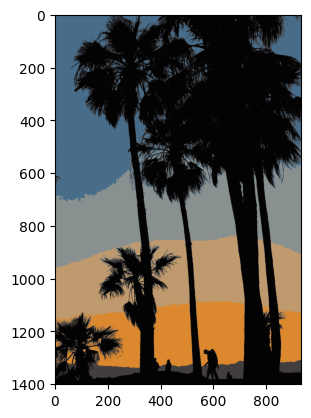

In [ ]:
plt.imshow(quantize_img)